In [1]:
import noise
import gym
import matplotlib.pyplot as plt
import numpy as np




env = gym.make("BipedalWalker-v2")
from pyglet import gl
import cProfile
_ = env.reset()

runs = []

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [2]:
#cProfile.run("[env.step(env.action_space.sample()) for _ in range(1000)]", sort="cumtime")
env.action_space.low

array([-1., -1., -1., -1.], dtype=float32)

CPU times: user 203 ms, sys: 45 ms, total: 248 ms
Wall time: 318 ms


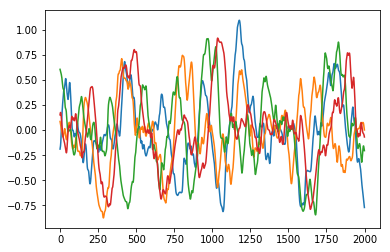

In [3]:
%%time
class Run:
    def __init__(self):
        self.obs_l = []
        self.reward_l = []
        self.action_l = []
    
from noise import pnoise1
def makeActionArray():
    start = np.random.random(4) * 10000
    out = []
    for _ in range(2000):
        action = [ 1.7 * pnoise1(_ / 200 + start_i, 5) for start_i in start]
        out.append(action)
    return np.array(out)
al = makeActionArray()
plt.plot(al)


def randomRun(sparse = False, encoded=True):
    _ = env.reset()
    done = False
    run = Run()

    run.action_l = makeActionArray()
    #action = env.action_space.sample()
    i = 0
    while not done:
        action = run.action_l[i]
        i += 1
        obs, reward, done, _ = env.step(action)
        #action_l.append(action)
        if(i % 10 == 0 or not sparse):
            run.obs_l.append(obs)
        run.reward_l.append(reward)
        if (len(run.reward_l) % 20 == 0):
            env.render()
    if encoded:
        run.obs_l = vae.encoder.predict(np.array(run.obs_l) / 255.)
    return run

run = randomRun(encoded=False)

In [4]:
%%time
runs = []
for _ in range(10000):
    try: 
        runs.append(randomRun(encoded=False))
    except Exception: 
        pass

CPU times: user 24min 40s, sys: 9 s, total: 24min 49s
Wall time: 33min 55s


In [3]:
import vae
vae.vae.load_weights("vae_cnn_mnist.h5")

/home/hastings/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 96, 96, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 47, 47, 32)   1568        encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 22, 22, 64)   32832       conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 10, 10, 128)  131200      conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_4 (

In [6]:
for run in runs:
    run.obs_l = [run.obs_l]

In [7]:
len(runs)

10000

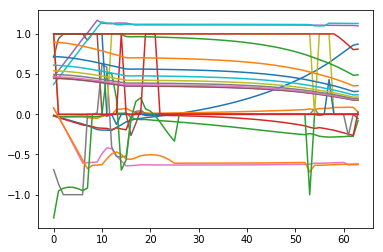

(68, 24)

In [17]:
plt.plot(runs[103].obs_l[0])
plt.show()
np.array(runs[11].obs_l[0]).shape

In [42]:
obs_array = np.concatenate([r.obs_l for r in runs])

In [43]:
obs_array.shape

(39636, 96, 96, 3)

In [44]:
import pickle
pickle.dump(obs_array, open("some_frames", "wb"))

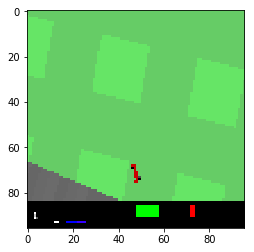

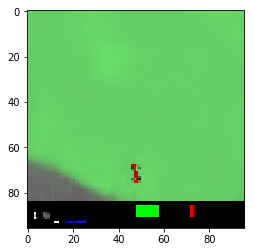

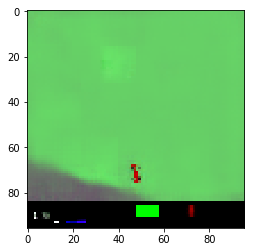

In [148]:
j = np.random.randint(10000)
plt.imshow(obs_array[j])
plt.show()
encoded = vae.encoder.predict(np.array(obs_array[j:j+1] / 255.))
plt.imshow(vae.decoder.predict(encoded[0])[0])
plt.show()
plt.imshow(vae.decoder.predict(encoded[2])[0])
plt.show()

In [157]:
runs = [randomRun() for _ in range(400)]

Track generation: 1165..1460 -> 295-tiles track
Track generation: 1260..1580 -> 320-tiles track
Track generation: 1043..1313 -> 270-tiles track
Track generation: 1049..1322 -> 273-tiles track
Track generation: 1142..1432 -> 290-tiles track
Track generation: 1193..1495 -> 302-tiles track
Track generation: 973..1225 -> 252-tiles track
Track generation: 1189..1490 -> 301-tiles track
Track generation: 1132..1419 -> 287-tiles track
Track generation: 1163..1463 -> 300-tiles track
Track generation: 1151..1443 -> 292-tiles track
Track generation: 1150..1442 -> 292-tiles track
Track generation: 1035..1301 -> 266-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1275..1598 -> 323-tiles track
Track generation: 1230..1542 -> 312-tiles track
Track generation: 1088..1364 -> 276-tiles track
Track generation: 1227..1538 -> 311-tiles track
Track generation: 1240..1554 -> 314-tiles track
Track generation: 1097..1375 -> 278-tiles track
Track generation:

Track generation: 1264..1584 -> 320-tiles track
Track generation: 1119..1403 -> 284-tiles track
Track generation: 1163..1458 -> 295-tiles track
Track generation: 1191..1492 -> 301-tiles track
Track generation: 1248..1565 -> 317-tiles track
Track generation: 1255..1585 -> 330-tiles track
Track generation: 1354..1697 -> 343-tiles track
Track generation: 1180..1479 -> 299-tiles track
Track generation: 1037..1300 -> 263-tiles track
Track generation: 1095..1373 -> 278-tiles track
Track generation: 1229..1540 -> 311-tiles track
Track generation: 1093..1379 -> 286-tiles track
Track generation: 1233..1545 -> 312-tiles track
Track generation: 1084..1359 -> 275-tiles track
Track generation: 1151..1443 -> 292-tiles track
Track generation: 1067..1343 -> 276-tiles track
Track generation: 1098..1376 -> 278-tiles track
Track generation: 1105..1385 -> 280-tiles track
Track generation: 1066..1337 -> 271-tiles track
Track generation: 1215..1523 -> 308-tiles track
Track generation: 996..1251 -> 255-tiles

Track generation: 1091..1339 -> 248-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1191..1493 -> 302-tiles track
Track generation: 1260..1579 -> 319-tiles track
Track generation: 1016..1274 -> 258-tiles track
Track generation: 1142..1441 -> 299-tiles track
Track generation: 1111..1393 -> 282-tiles track
Track generation: 1231..1543 -> 312-tiles track
Track generation: 1248..1564 -> 316-tiles track
Track generation: 1258..1576 -> 318-tiles track
Track generation: 1109..1393 -> 284-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1244..1559 -> 315-tiles track
Track generation: 1123..1408 -> 285-tiles track
Track generation: 1091..1368 -> 277-tiles track
Track generation: 1000..1254 -> 254-tiles track
Track generation: 996..1249 -> 253-tiles track
Track generation: 1218..1536 -> 318-tiles track
Track generation: 1080..1360 -> 280-tiles track
Track generation: 1196..1499 -> 303-tiles

In [159]:
import cv2
decoded = vae.decoder.predict(runs[20].obs_l[0])
for im in decoded:
    cv2.imshow("hi", im)
    if cv2.waitKey(10) != -1:
        break

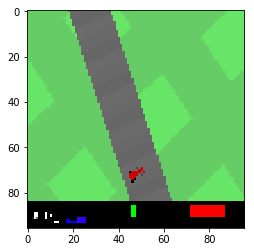

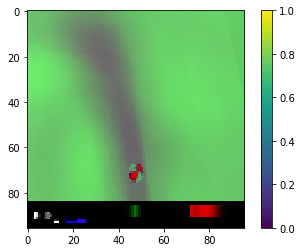

In [152]:
i = 1910
plt.imshow(obs_array[i].reshape((96, 96, 3)))
plt.show()
plt.imshow(np.clip( pca.inverse_transform(pca.transform(np.expand_dims(obs_array[i], 0))).reshape(96, 96, 3)/ 256, 0, 1))
plt.colorbar()

In [12]:
import pickle
pickle.dump(runs, open("some_walks.pickle", "wb"))